# Implemantación en Python: algoritmos de prescripción auditiva.


## Descripción:
El siguiente algoritmo corresponde a un sistema de preparación de señales sonoras y procesamiento de la misma según los algoritmos más utilizados en para la programación de los prosteticos auditivos.
## Motivación:
Este algoritmo ha sido diseñado con el proposito de integrarse a un sistema embedido como raspberry pi para el desarrollo de un audifono digital.

## Objetivos
> Objetivo General:
>> Implementar en Python diferentes algoritmos utilizados para la prescripción auditiva

> Objetivos Especificos:
>> Implementar Sistemas de Amplificación <br>
>> Implementar Métodos de compresión  <br>
>> Implemtación de otros procesamientos de Señal <br>
>> Modelo de aplicación de algoritmos en señales sonoras
    
Este proyecto ha sido desarrollado en Jupiter-notebook (v6.4.0) con python (v3.9.5)


=========================
# INDICE
 
* [Introducción](#Chapter1)<br>
* [Importaciones](#Chapter2)<br>
* [Sistemas de compresion](#sistemacompresion)<br>
    * [WDRC](#WDRC)<br>

* [Prescriptivos](#prescriptivos) <br>
    * [Módelos no lineales](#noLineales)
        * [FIG6](#FIG6)
            * [FIG6 ganancia](#FIG6_ganancia)
        * [DSL I/O](#DSLIO)
        * [NAL-NL1 y NAL-NL2](#NALNL) <br>

    * [Lineales](#lineales)
        * [NAL-R](#nalr)
        * [NAL-RP](#nalrp)
            * [NAL-RP ejemplos](#nalrp_example)
        * [POGO II](#pogoII)
            * [POGO II ejemplos](#pogo_II_example)
        * [DSL 4.0](#DSL)
            * [DSL 4.0 ejemplos](#DSL4_ejemplo)
        * [Comparación NAL-RP/POGO II/DSL](#NAL_POGO_DSL)





# Introducción <span id="Chapter1"><span>



Nota: 
Cada item incluye:
* Comentarios en el código
* Gráficos de los resutados
* Resultados en ficheros de sonido

# Importaciones <span id="Chapter2"><span>
    
Importamos las librerias necesarias, en este trabajo se privilegia la utilización directa de numpy, pueden existir otras librerias pero con el tiempo se iran quitando para implementar el uso de numpy.

## Librosa:
Version: 0.8.1

web : https://librosa.org/

Librosa es una implementación para el analisis de audio y música.

> McFee, Brian, Colin Raffel, Dawen Liang, Daniel PW Ellis, Matt McVicar, Eric Battenberg, and Oriol Nieto. “librosa: Audio and music signal analysis in python.” In Proceedings of the 14th python in science conference, pp. 18-25. 2015.


## Matplotlib
Version: 3.3.4

web:https://matplotlib.org/

Matplotlib es una libreria para realizar grafico de datos.

>John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55 



## Numpy
Version: 1.20.2

web: https://numpy.org/

Numpy es una libreria que permite la creación y manejo de vectores y matrices.

> Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 0.1038/s41586-020-2649-2. (Publisher link).


## SciPy
Version: 1.6.2

web: https://www.scipy.org/

Libreria con un gran conjunto de algoritmos mátematicos y de manejo de señales

> Pauli Virtanen, Ralf Gommers, Travis E. Oliphant, Matt Haberland, Tyler Reddy, David Cournapeau, Evgeni Burovski, Pearu Peterson, Warren Weckesser, Jonathan Bright, Stéfan J. van der Walt, Matthew Brett, Joshua Wilson, K. Jarrod Millman, Nikolay Mayorov, Andrew R. J. Nelson, Eric Jones, Robert Kern, Eric Larson, CJ Carey, İlhan Polat, Yu Feng, Eric W. Moore, Jake VanderPlas, Denis Laxalde, Josef Perktold, Robert Cimrman, Ian Henriksen, E.A. Quintero, Charles R Harris, Anne M. Archibald, Antônio H. Ribeiro, Fabian Pedregosa, Paul van Mulbregt, and SciPy 1.0 Contributors. (2020) SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods, 17(3), 261-272.



In [1]:
##Intalar las librerias
!pip install librosa --upgrade -q
!pip install Matplotlib --upgrade -q
!pip install numpy --upgrade -q
!pip install scipy --upgrade -q
#!pip install mpld3 --upgrade -q



In [1]:
#### Librerias de visualización, no son fundamentales en la implementación en embedidos ####

import librosa
#imprtamos módulo que permite crear espectogramas
from librosa.display import specshow 

#Magia!
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
#importamos pyplot de matplotlib como plt para un uso más intuitivo

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#### Librerias de procesamiento de señal ####

#importamos numpy como np un uso más intuitivo
import numpy as np 

#Importamos scipy.wavfile para abrir archivos wav
import scipy.io.wavfile as wav 
#Importamos scipy.wavfile para guardar archivos wav
from scipy.io.wavfile import write 
#Importamos butter y lfilter para crear los filtros necesarios
from scipy.signal import butter, lfilter


### Otras librerias que solo ayudan a la operativa ###
import pathlib


#colores
cl_1 = '#896983'
cl_2 = '#171716'
cl_3 = '#5c5b58'
cl_4 = '#171716'
cl_5 = '#454442'
cl_6 = '#73726e'


In [3]:
## JOVIAN API que permite subir el archivo a la red a https://jovian.ai
!pip install jovian --upgrade -q

In [4]:
import jovian
jovian.commit(filename='TESIS_G2_V2.ipynb', project='Banco de pruebas para algoritmos de prescripción auditiva')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Updating notebook "debaq/banco-de-pruebas-para-algoritmos-de-prescripcion-auditiva" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/debaq/banco-de-pruebas-para-algoritmos-de-prescripcion-auditiva


'https://jovian.ai/debaq/banco-de-pruebas-para-algoritmos-de-prescripcion-auditiva'

# Sistemas de Compresión <span id="sistemacompresion"><span>
    



## WDRC <span id="WDRC"><span>
    
    Sistema de amplificación de amplio rango dinámico este permite comprimir los sonidos de entrada, es decir, los que son suaves se hacen audibles, los moderados serán cómodos y los intensos se perciben confortables para el usuario.
    
> Pasik Y. Audioprótesis · Enfoque médico, fonoaudiológico y electroacústico [Internet]. Argentina: Mutualidad Argentina de Hipoacúsicos; 2004. Available from: https://mah.org.ar/libros-mah/
    
    
    release_time 
> Alexander, J. M., & Masterson, K. (2015). Effects of WDRC release time and number of channels on output SNR and speech recognition. Ear and hearing, 36(2), e35–e49. https://doi.org/10.1097/AUD.0000000000000115
    

In [2]:
def attack_time():
    pass
def release_time():
    pass


def wdrc(pdb, exp_cr=0.57, exp_end_knee=30, tkgn=20,  tk=50,  cr=1.5, bolt=90, limit=8.0):
    """
    Tomado y modificado de : Chip Audette, OpenAudio, June 2020, MIT License
    
    """
    
    gdb = 0.0
    tkgo= 0.0
    pblt= 0.0
    k= 0.0
    tk_tmp = tk 
    if ((tk_tmp + tkgn) > bolt): 
        tk_tmp = bolt - tkgn 

    tkgo = tkgn + tk_tmp * (1.0 - 1.0 / cr)  #intermediate calc
    pblt = cr * (bolt - tkgo) 
    cr_const = ((1.0 / cr) - 1.0) 

    #
    gain_at_exp_end_knee = tkgn
    if (tk_tmp < exp_end_knee):
        gain_at_exp_end_knee  = cr_const * exp_end_knee + tkgo
    
    # se calculan las ganancias
    exp_cr_const = 1.0/max(0.01,exp_cr) - 1.0
    regime = 0
    if (pdb < exp_end_knee): #if below the expansion threshold, do expansion expansion region.
        gdb = gain_at_exp_end_knee - ((exp_end_knee-pdb)*exp_cr_const) #reduce gain the farther down you are from the end of the expansion region
        regime = 0
    elif ((pdb < tk_tmp) and (cr >= 1.0)): #si el input esta bajo el nivel de compresión se realiza ganancia lineal
        gdb = tkgn  
        regime = 1
    elif (pdb > pblt): #se verifica que la intensidad ingresada este sobre el nivel de limite
        gdb =  bolt + ( (pdb - pblt) / limit) - pdb #10:1 se limita, esto puede ir desde 8:10 hasta el infito
        regime = 3
    else:
        gdb = cr_const * pdb + tkgo #Compresión
        regime = 2
    

    output_dB = pdb + gdb
    output = [output_dB, regime]
    return output



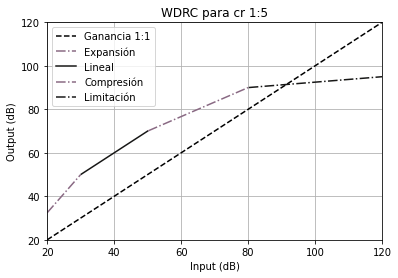

In [3]:
input_db = np.arange(20,121,0.2)

expand = []
linear = []
compress = []
limit = []

for i in input_db:
    data = wdrc(i)

    if data[1] == 0:
        expand.append(data[0])
    if data[1] == 1:
        linear.append(data[0])
    if data[1] == 2:
        compress.append(data[0])
    if data[1] == 3:
        limit.append(data[0])

    

fig, ax = plt.subplots()
ax.plot(input_db, input_db, linestyle="--", label="Ganancia 1:1", color='k')
ax.plot(input_db[0:len(expand)], expand, linestyle="dashdot", label="Expansión", color=cl_1)
ax.plot(input_db[len(expand):len(linear)+len(expand)],linear, label="Lineal", color = cl_2)
ax.plot(input_db[len(linear)+len(expand):len(linear)+len(expand)+len(compress)],compress,  linestyle="dashdot", label="Compresión", color = cl_1)
ax.plot(input_db[len(linear)+len(expand)+len(compress):],limit,  label="Limitación", linestyle="dashdot", color = cl_2)
plt.xlim([20, 120])
plt.ylim([20, 120])
ax.set(xlabel='Input (dB)', ylabel='Output (dB)',
       title='WDRC para cr 1:5')
leg = ax.legend()
plt.grid(True)
fig.savefig("ejemplos de WDRC.jpg")

plt.show()


## Compresión Lineal <span id="compresionLineal"><span>

In [7]:
#Sin implemenatación

# Presentación de modelos prescriptivos <span id="prescriptivos"><span>
    
    
    se insertan datos para graficar, ejemplo de pérdida auditiva plana y descendente, umbral de molestia 

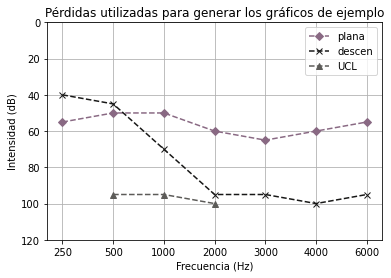

In [4]:
# Data for plotting

HTL_plana={"250":55,"500":50,"1000":50,"2000":60,"3000":65,"4000":60,
           "6000":55}

HTL_descendente ={"250":40,"500":45,"1000":70,"2000":95,"3000":95,"4000":100,
           "6000":95}

UCL = {"500":95, "1000":95, "2000":100}


curve_plane = HTL_plana.items()
x1, y1 = zip(*curve_plane)


curve_desc = HTL_descendente.items()
x2, y2 = zip(*curve_desc)

curve_UCL = UCL.items()
x3, y3 = zip(*curve_UCL)

fig, ax = plt.subplots()

ax.plot(x1,y1, linestyle='--', marker='D', color=cl_1, label='plana')
ax.plot(x2,y2, linestyle='--', marker='x', color=cl_2, label='descen')
ax.plot(x3,y3, linestyle='--', marker='^', color=cl_3, label='UCL')

leg = ax.legend();
plt.ylim([0, 120])
plt.gca().invert_yaxis()


ax.set(xlabel='Frecuencia (Hz)', ylabel='Intensidad (dB)',
       title='Pérdidas utilizadas para generar los gráficos de ejemplo')
ax.grid()

fig.savefig("ejemplos de perdida.jpg")
plt.show()


## Módelos no lineales: <span id="noLineales"><span>
    


## FIG6 <span id="fig6"><span>
    
        Inicia la función para Fig 6 funciona basándose en una intensidad la cual se clasifica, se aplica una fórmula determinada para que luego esa ganancia obtenida se sume al input dando como resultado un output.
    
    > Pasik Y. Audioprótesis · Enfoque médico, fonoaudiológico y electroacústico [Internet]. Argentina: Mutualidad Argentina de Hipoacúsicos; 2004. Available from: https://mah.org.ar/libros-mah/

In [6]:

def FIG6(i, HTL):
    """
    i = intensidad de la señal de entrada
    HTL = Umbral Auditivo
    IG = Ganancia de inserción
    """
    i_a = i
    HTL = int(HTL)
    if i_a < 45: # dBSPL
        if HTL <= 20:
            IG= 0
        if HTL > 20 and HTL < 60:
            IG= HTL - 20
        if HTL >= 60:
            p1 = HTL - 20
            p2 = HTL - 60
            p3 = 0.5 * p2
            IG= p1 - p3
  

    if i_a >= 45 and i < 95:
        if HTL <= 20:
            IG= 0
        if HTL > 20 and HTL < 60:
            IG= 0.6 * (HTL-20)
        if HTL >= 60:
            IG= 0.8 * HTL - 23
            
            
    if i_a >= 95:
        if HTL >= 40:
            IG= 0.1 * (HTL-40)**1.4
        else:
            IG= 0
            
    
    return IG



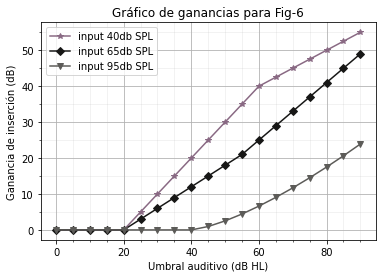

In [7]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
list_htl = np.arange(0,95,5)

gain_40_fig6=[[],[]]
gain_65_fig6=[]
gain_95_fig6=[]

for i in list_htl:
    gain_r = FIG6(40, i)
    gain_40_fig6[0].append(gain_r)
    gain_40_fig6[1].append(i)
    gain_r = FIG6(65, i)
    gain_65_fig6.append(gain_r)
    gain_r = FIG6(95, i)
    gain_95_fig6.append(gain_r)



fig, ax = plt.subplots()
ax.plot(gain_40_fig6[1], gain_40_fig6[0], label="input 40db SPL", color= cl_1, marker = '*')
ax.plot(gain_40_fig6[1], gain_65_fig6, label="input 65db SPL", color=cl_2, marker = 'D')
ax.plot(gain_40_fig6[1], gain_95_fig6, label="input 95db SPL", color=cl_3, marker = 'v')
leg = ax.legend();
ax.set(xlabel='Umbral auditivo (dB HL)', ylabel='Ganancia de inserción (dB)',
       title='Gráfico de ganancias para Fig-6')
ax.grid(True)
ax.grid(which='minor', alpha=0.2)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
fig.savefig("ejemplos de perdida - Fig6.jpg")



## FIG6 - Ganancia <span id="FIG6_ganancia"><span>
    
Ejemplo gráfico del funcionamiento del algoritmo.

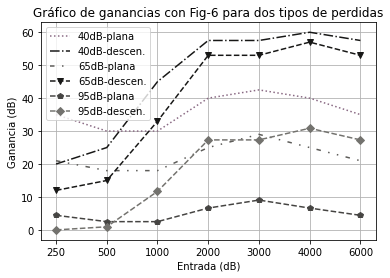

In [18]:
HTL_p = HTL_plana
HTL_d = HTL_descendente

gain_40 = [[],[]]
gain_65 = [[],[]]
gain_90 = [[],[]]

f = []

for i in HTL_p:
    gain_r = FIG6(40, HTL_p[i])
    gain_40[0].append(gain_r)
    f.append(i)

for i in HTL_d:
    gain_r = FIG6(40,HTL_d[i])
    gain_40[1].append(gain_r)
    
for i in HTL_p:
    gain_r = FIG6(65, HTL_p[i])
    gain_65[0].append(gain_r)

for i in HTL_d:
    gain_r = FIG6(65,HTL_d[i])
    gain_65[1].append(gain_r)

for i in HTL_p:
    gain_r = FIG6(95, HTL_p[i])
    gain_90[0].append(gain_r)

for i in HTL_d:
    gain_r = FIG6(95,HTL_d[i])
    gain_90[1].append(gain_r)

fig, ax = plt.subplots()



ax.plot(f,gain_40[0], linestyle='dotted', color=cl_1, label='40dB-plana')
ax.plot(f,gain_40[1], linestyle='dashdot', color=cl_2, label='40dB-descen.')
ax.plot(f,gain_65[0], linestyle=(0, (3, 5, 1, 5, 1, 5)), color=cl_3, label='65dB-plana')
ax.plot(f,gain_65[1], linestyle='--', color=cl_4, label='65dB-descen.', marker = 'v')
ax.plot(f,gain_90[0], linestyle='--', color=cl_5, label='95dB-plana', marker = 'p')
ax.plot(f,gain_90[1], linestyle='--', color=cl_6, label='95dB-descen.', marker = 'D')

leg = ax.legend();

ax.set(xlabel='Entrada (dB)', ylabel='Ganancia (dB)',
       title='Gráfico de ganancias con Fig-6 para dos tipos de perdidas')
ax.grid()

fig.savefig("gain_fig6.jpg")
plt.show()

## DSL I/O <span id="DSLIO"><span>
> Seewald, R., Moodie, S., Scollie, S., & Bagatto, M. (2005). The DSL method for pediatric hearing instrument fitting: historical perspective and current issues. Trends in amplification, 9(4), 145–157. https://doi.org/10.1177/108471380500900402

> S S, Vignesh. (2014). Adaptive Expert System for Digital Hearing Aids Gain recommendations using Linear and Non Linear Prescriptive Procedures. WSEAS Transactions on Biology and Biomedicine. 11. https://www.researchgate.net/publication/275582747_Adaptive_Expert_System_for_Digital_Hearing_Aids_Gain_recommendations_using_Linear_and_Non_Linear_Prescriptive_Procedures


In [11]:
#En diseño
def DSL_IO(i): 
    
    if I < I_min:
        O = O_min
    if I_min < I and I < I_max:
        O = (I_min/I_max-I_min)*(O_max-O_min)+O_min
    if I > I_max:
        O = O_max
        
    return O

No lineales aún o implementados:

## NAL-NL1 y NAL-NL2 <span id="NALNL"><span>
> Keidser, G., Dillon, H., Flax, M., Ching, T., & Brewer, S. (2011). The NAL-NL2 Prescription Procedure. Audiology Research, 1, 88–90. https://www.mdpi.com/2039-4349/1/1/e24#cite

In [12]:
def NAL_NL1(threshold, f): 
    gain = 0
    return gain 

def NAL_NL2(threshold, f): 
    gain = 0
    return gain 



## Lineales <span id="lineales"><span>

## NAL - R <span id="nalr"><span>
    
    actúa si el umbral de audición promedio medido en 500, 1000 y 2000 Hz supera los 60 dB y el NAL-RP cuando el grado de umbral de audición a 2000 Hz supera los 90 dB.

> Keidser G, Dillon H, Flax M, Ching T, Brewer S. The NAL-NL2 Prescription Procedure. Audiology Research [Internet]. MDPI AG; 2011 Mar 23;1(1):88–90. Available from: http://dx.doi.org/10.4081/audiores.2011.e24
    

> Rajkumar, Dr Sadagopan. (2013). Adaptive expert system for calculation of real ear insertion gain for digital hearing aid. OnLine Journal of Biological Sciences. 13. 10.3844/ojbssp.2013.82.90. 

Abstract
> The various gain calculating formulae for digital hearing aids is analyzed for different subjects to find out
suitable adaptive gain formula for most successful gain recommendations. The object of the work is to
design and develop an adaptive expert system, which could be effectively used to perform screening tests to
identify the level of hearing impairment and recommend suitable gain suggestions for frequency bands of
digital hearing aid. Initially, the design requirements for a digital hearing aid are being arrived by using the
standard gain formulae followed such as National Acoustic Laboratory Revised (NAL-R) and Prescription
of Gain Output (POGO II). The test is carried with 272 subjects aging from 25 to 72 and 221 male and 51
female. Of which gain is recommended for 127 subjects with the standard gain formula. When the
recommendations are verified for satisfaction among the hearing aid users only 28 received satisfaction with
NAL-R and 25 received satisfactions with POGO II. Remaining subjects received satisfaction only after
fine tuning the gain value and recommended gains are stored in adaptive expert system. Subsequently,
based on the suggested value of gains and additional data from expert audiologists, gain formula could be
made distinct for every language.

In [9]:

def NAL_R(f, th_list):
    """
    HTL = Umbral Auditivo (valor int)
    f = frecuencia (str)
    th_list = lista de threshold (dic)
    return = REIG ganancia requerida por la frecuencia de entrada
    
    NAL-R:
        A + 0.31 * HTL + (Z)
        donde A = 0.05(HTL@500Hz * HTL@1000Hz + HTL@2000Hz)
    """
    
      
    f = str(f)
    HTL = th_list[f]
    
    #modificación según Byrne et al., 1990; 1991
    mod_1_sum = th_list["500"] + th_list["1000"] + th_list["2000"]
    H_3fa = (mod_1_sum)/3


    CZ={
        "250"  : -17,
        "500"  : -8,
        "1000" : 1,
        "2000" : -1,
        "3000" : -2,
        "4000" : -2,
        "6000" : -2,
        }

    X = 0.15*H_3fa
    IG = X + (0.31 * HTL) + CZ[f]

    
    return IG

    


## NAL - RP <span id="nalrp"><span>
    
    NAL-RP  actúa cuando el grado de umbral de audición a 2000 Hz supera los 90 dB
    
    > Keidser G, Dillon H, Flax M, Ching T, Brewer S. The NAL-NL2 Prescription Procedure. Audiology Research [Internet]. MDPI AG; 2011 Mar 23;1(1):88–90. Available from: http://dx.doi.org/10.4081/audiores.2011.e24
   

In [10]:
def NAL_RP(f,th_list):
    '''
    return = PC corrección para perdidas profundas
    
    '''
    
    db = [95,100,105,110,115,120]
    CZ={
        "250":[4,6,8,11,13,15],
        "500":[3,4,5,7,8,9],
        "1000":[0,0,0,0,0,0],
        "2000":[-2,-3,-5,-6,-8,-9],
        "3000":[-2,-3,-5,-6,-8,-9],
        "4000":[-2,-3,-5,-6,-8,-9],
        "6000":[-2,-3,-5,-6,-8,-9],
        }
    
    
    f = str(f)
    HTL = th_list[f]
    H_2K = th_list["2000"]
    
    mod_1_sum = th_list["500"] + th_list["1000"] + th_list["2000"]
    H_3fa = (mod_1_sum)/3
        
    if H_2K <= 90:
        PC = 0
    else:
        idx = db.index(H_2K)
        PC = CZ[f][idx]
    
    if H_3fa >= 60:
        X = (0.15*H_3fa) + (0.2*(H_3fa - 60)) 
    else:
        X = 0.15*H_3fa
    nal_r = NAL_R(int(f),th_list)

    IG = nal_r + PC

      
    return IG

## NAL-R y NAL-RP  Ganancia para la perdida de ejemplo <span id="nalrp_example"><span>
    
    ganancia para la pérdida de ejemplo de gráfico del funcionamiento del algoritmo con pérdida auditiva plana y descendente, 

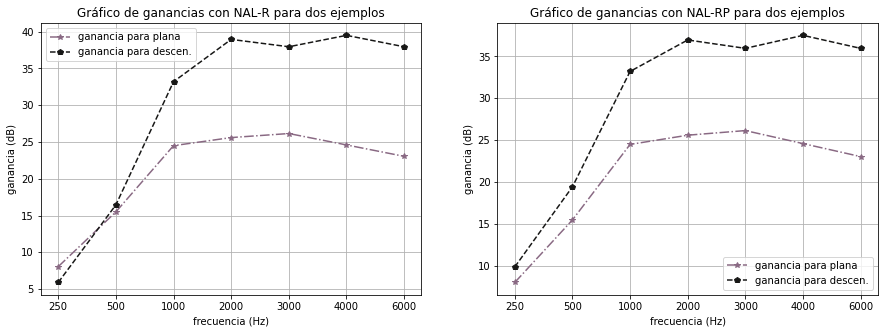

In [11]:
HTL_p = HTL_plana
HTL_d = HTL_descendente

gain_nalr_p = []
gain_nalr_d = []
gain_nalrp_p = []
gain_nalrp_d = []

f = []
#Calculos de NAL-R
for i in HTL_p:
    gain_r = NAL_R(i, HTL_p)
    gain_nalr_p.append(gain_r)
    f.append(i)

for i in HTL_d:
    gain_r = NAL_R(i, HTL_d)
    gain_nalr_d.append(gain_r)

#Calculos de NAL-RP
for i in HTL_p:
    gain_r = NAL_RP(i, HTL_p)
    gain_nalrp_p.append(gain_r)
for i in HTL_d:
    gain_r = NAL_RP(i, HTL_d)
    gain_nalrp_d.append(gain_r)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(f,gain_nalr_p, linestyle='dashdot', marker='*', color=cl_1, label='ganancia para plana')
ax[0].plot(f,gain_nalr_d, linestyle='--', marker='p', color=cl_2, label='ganancia para descen.')
ax[1].plot(f,gain_nalrp_p, linestyle='dashdot', marker='*', color=cl_1, label='ganancia para plana')
ax[1].plot(f,gain_nalrp_d, linestyle='--', marker='p', color=cl_2, label='ganancia para descen.')
ax[0].legend();
ax[1].legend();

ax[0].set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title='Gráfico de ganancias con NAL-R para dos ejemplos')
ax[0].grid()
ax[1].set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title='Gráfico de ganancias con NAL-RP para dos ejemplos')
ax[1].grid()

fig.savefig("gain-nalrp1.jpg")
plt.show()

## POGO II <span id="pogoII"><span>
    
    a medida que aumenta el umbral de audición, también aumenta la ganancia.
    
    >  Dillon H. Hearing Aids. 2nd ed. New York, NY: Thieme Medical; 2012.

In [12]:
def POGO_II(f, th_list, UCL):
    '''
    return = REIG ganancia requerida por la frecuencia de entrada
    
    '''
    f = str(f)
    HTL = th_list[f]
    CZ ={
        "250"  : -10,
        "500"  : -5,
        "1000" : 0,
        "2000" : 0,
        "3000" : 0,
        "4000" : 0,
        "6000" : 0,
        }
    
    PeakSSPL90 = (((UCL["500"]) + (UCL["1000"]) + UCL["2000"])/3)+4
    
    med_HTL = HTL * 0.5
    
    if HTL > 65:
        IG = med_HTL + CZ[f] + (0.5*(HTL-65))
    else:
        IG = med_HTL + CZ[f]
    
    return (IG, PeakSSPL90)
        
        

## POGO II Ganancia para las perdidas de ejemplo  <span id="pogo_II_example"><span>
    
    ejemplo gráfico de ganancia con pérdida auditiva plana y descendente  

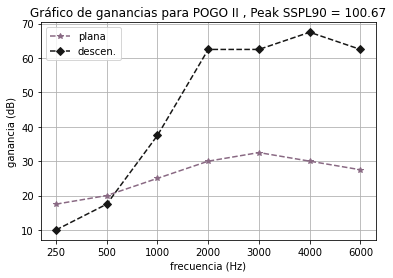

In [13]:
HTL_p = HTL_plana
HTL_d = HTL_descendente

gain_p = []
gain_d = []
f = []

for i in HTL_p:
    gain_r, p = POGO_II(i, HTL_p, UCL)
    gain_p.append(gain_r)
    f.append(i)

for i in HTL_d:
    gain_r, p = POGO_II(i, HTL_d, UCL)
    gain_d.append(gain_r)


fig, ax = plt.subplots()
ax.plot(f,gain_p, linestyle='--', marker='*', color=cl_1, label='plana')
ax.plot(f,gain_d, linestyle='--', marker='D', color=cl_2, label='descen.')


leg = ax.legend();

title = 'Gráfico de ganancias para POGO II , Peak SSPL90 = {}'.format(round(p,2))

ax.set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title=title)
ax.grid()

fig.savefig("gain-POGO II.jpg")


## DSL v4.0 <span id="DSL"><span>
    
    En las pérdidas profundas los niveles de sensación deseados se van a basar en los niveles de sensación encontrados para que sean óptimos 
    
    >  Dillon H. Hearing Aids. 2nd ed. New York, NY: Thieme Medical; 2012.

In [14]:

def DSL_40(HTL, f):
    """
    HTL: umbral auditivivo
    f: frecuencia del umbral
    IG
    
    """
    frs = [250,500,750,1000,1500,2000,3000,4000,6000]
    mtrx_DSL = {
        "0": [0,2,3,3,5,12,16,14,8],
        "5": [3,4,5,5,8,15,18,17,11],
        "10": [5,6,7,8,10,17,20,19,14],
        "15":[7,8,10,10,13,19,23,21,17],
        "20":[9,11,12,13,15,22,25,24,20],
        "25":[12,13,14,15,18,24,28,27,23],
        "30":[14,15,17,18,20,27,30,29,26],
        "35":[17,18,19,21,23,30,33,32,29],
        "40":[20,20,22,24,26,33,36,35,32],
        "45":[22,23,25,27,29,36,39,38,36],
        "50":[25,26,28,30,32,39,42,41,39],
        "55":[29,29,31,33,35,42,45,45,43],
        "60":[32,32,34,36,38,46,48,48,46],
        "65":[36,35,37,40,42,49,52,51,50],
        "70":[39,38,40,43,45,52,55,55,54],
        "75":[43,42,43,46,48,56,59,58,58],
        "80":[47,45,47,50,52,59,62,62,61],
        "85":[51,48,50,53,55,63,66,65,65],
        "90":[55,52,54,57,59,66,69,69,69],
        "95":[59,55,57,60,62,70,73,73,69],
        "100":[62,59,61,64,66,73,76,76,69],
        "105":[62,62,64,68,70,77,80,80,69],
        "110":[62,66,68,71,73,80,83,84,69]
    }
    HTL = str(HTL)
    if type(f) == type(1):
        int_f = f
    else:
        int_f = int(f)
    idx = frs.index(int_f)
    REAG = mtrx_DSL[HTL][idx]
        
    
    return REAG

## DSL v4.0 ejemplo <span id="DSL4_ejemplo"><span>
    
    ejemplo gráfico de ganancia de pérdidas auditivas plana y descendente 

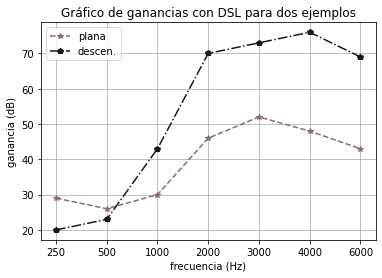

In [15]:
HTL_p = HTL_plana
HTL_d = HTL_descendente


gain_p = []
gain_d = []
f = []

for i in HTL_p:
    gain_r = DSL_40(HTL_p[i], i)
    gain_p.append(gain_r)
    f.append(i)

for i in HTL_d:
    gain_r = DSL_40(HTL_d[i], i)
    gain_d.append(gain_r)

fig, ax = plt.subplots()
plana = ax.plot(f,gain_p, linestyle='--', marker='*', color=cl_1, label='plana')
descen = ax.plot(f,gain_d, linestyle='dashdot',marker='p', color=cl_2, label='descen.')


leg = ax.legend();


title = 'Gráfico de ganancias con DSL para dos ejemplos'



ax.set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title=title)
ax.grid()

fig.savefig("gain-DSL.jpg")
plt.show()

## Comparación entre NAL-RP, POGO II, DSL <span id="NAL_POGO_DSL"><span>
    
    
    con pérdidas auditivas plana y descendente, se importan las funciones para así graficar y ejemplificar 

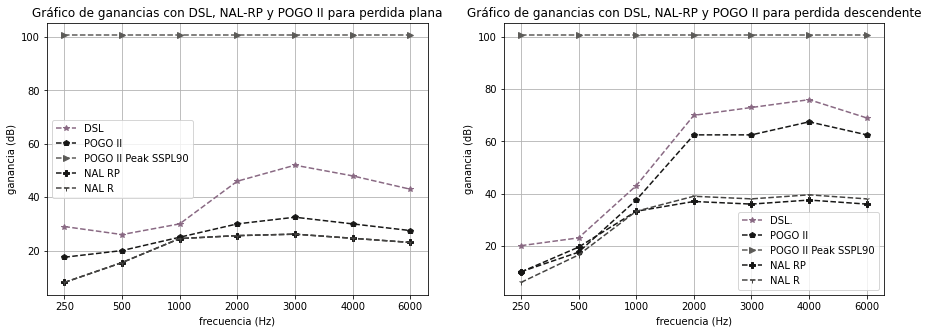

In [17]:
HTL_p = HTL_plana
HTL_d = HTL_descendente


DSL_p = []
DSL_d = []
POGOII_p = []
POGOII_p_SPL = []
POGOII_d = []
POGOII_d_SPL = []
NALRP_p = []
NALRP_d = []
NALR_p = []
NALR_d = []
f = []

for i in HTL_p:
    gain_r = DSL_40(HTL_p[i], i)
    DSL_p.append(gain_r)
    
    gain_r = POGO_II(i, HTL_p, UCL)
    POGOII_p.append(gain_r[0])
    POGOII_p_SPL.append(gain_r[1])
    
    gain_r = NAL_RP(i, HTL_p)
    NALR_p.append(gain_r)
    gain_r = NAL_R(i, HTL_p)
    NALRP_p.append(gain_r)
    f.append(i)

for i in HTL_d:
    gain_r = DSL_40(HTL_d[i], i)
    DSL_d.append(gain_r)

    gain_r = POGO_II(i, HTL_d, UCL)
    POGOII_d.append(gain_r[0])
    POGOII_d_SPL.append(gain_r[1])
    
    gain_r = NAL_R(i, HTL_d)
    NALR_d.append(gain_r)
    
    gain_r = NAL_RP(i, HTL_d)
    NALRP_d.append(gain_r)
    
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].plot(f,DSL_p, linestyle='--', marker='*', color=cl_1, label='DSL')
ax[0].plot(f,POGOII_p, linestyle='--', marker='p', color=cl_2, label='POGO II')
ax[0].plot(f,POGOII_p_SPL, linestyle='--', marker='>', color=cl_3, label='POGO II Peak SSPL90')
ax[0].plot(f,NALRP_p, linestyle='--', marker='P', color=cl_4, label='NAL RP')
ax[0].plot(f,NALR_p, linestyle='--', marker='1', color=cl_5, label='NAL R')

ax[1].plot(f,DSL_d, linestyle='--',marker='*', color=cl_1, label='DSL.')
ax[1].plot(f,POGOII_d, linestyle='--', marker='p', color=cl_2, label='POGO II')
ax[1].plot(f,POGOII_d_SPL, linestyle='--', marker='>', color=cl_3, label='POGO II Peak SSPL90')
ax[1].plot(f,NALRP_d, linestyle='--', marker='P', color=cl_4, label='NAL RP')
ax[1].plot(f,NALR_d, linestyle='--', marker='1', color=cl_5, label='NAL R')

ax[0].legend();
ax[1].legend();


title = 'Gráfico de ganancias con DSL, NAL-RP y POGO II para perdida plana'
title1 = 'Gráfico de ganancias con DSL, NAL-RP y POGO II para perdida descendente'



ax[0].set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title=title)
ax[0].grid()

ax[1].set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title=title1)
ax[1].grid()




fig.savefig("gain-DSL_NALRP_POGOII.jpg")
plt.show()

# Analisis de flujo de audio

## Presentación de Sonidos de Prueba

A continuaciónse presentan los sonidos de pruebas utilizados que corresponden a grabaciones de voz hablada de las listas de palabras de Farfán 

> Julio Palacios. Evaluación de familiaridad y rendimiento de lista de palabras usadas en logo audiometría. 2000. Tesis para optar al titulo de tecnologo médico con manción en otorrinolaringología.




In [27]:
dir_base = pathlib.Path().absolute()
dir_audio = "audio_tesis"
sonido_list= ["cables_mono","cuento_mono"]
sonido_dir = []

for i in sonido_list:
    name = "{}/{}/{}.wav".format(dir_base, dir_audio, i)
    sonido_dir.append(name)  

In [38]:
### Esta función fue tomada y modificada de la doumenteación provista por librosa

def spectro(sampling_rate, audio_signal, name):
    '''
    sampling_rate : int, frecuencia de muestreo de la señal a procesar,
    audio_signal : np.array, array con la señal de audio
    name : str, nombre del audio para gráficar    
    '''
    #Preparación de los datos:
    window_length = int(0.0025 * sampling_rate)
    hop_length = int(0.0025* sampling_rate)
    lib_stft =librosa.stft(audio_signal, hop_length=hop_length, win_length=window_length)
    spectrogram = np.abs(lib_stft)
    
    #Se plotea el espectrograma:
    fig, ax = plt.subplots()
    
    ##Dibuja la imagen
    specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sampling_rate, hop_length=hop_length, cmap='gray_r',  y_axis='linear', x_axis='time')
    ##plt.ylim(20, 8000)
    
    ##Configuramos el tamaño
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    
    ##Ponemos el titulo
    new_name = "palabra : {}, rate: {}".format(name, sampling_rate)
    plt.title(new_name)
    
    ##Ponemos escala
    plt.colorbar(format='%+2.0f dB')
    
    ##Configura el grosor de las lineas por default
    plt.tight_layout()
    
    ##Guarda la imagen
    plt.savefig("tft_{}.png".format(name))


    

In [39]:
## Esta función permite gráficar en 2d la fuente de sonido en la dimensión del tiempo

def draw_sound(file , name = False):
    '''
    file : str, ruta del fichero a graficar
    name : bolean
    '''
    audio_signal, sampling_rate = librosa.load(file)

    
    # Se resuelve el problema de los inputs sin nombre
    if name:
        name = "text"
        name2 = "text"
    else:
        number_inx = sonido_dir.index(file)
        name = "sonido : {}, rate: {}, channel: {}".format(sonido_list[number_inx].split("_")[0], sampling_rate, sonido_list[number_inx].split("_")[1])
        name2 = sonido_list[number_inx].split("_")[0]

    #Configuramos el tamaño
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    plt.plot(audio_signal, color=cl_1)
    
    #Se le coloca el título
    plt.title(name)
    
    #Configura el grosor de las lineas por default
    plt.tight_layout()
    plt.figure()
    
    #Configura el grosor de las lineas por default
    plt.tight_layout()
    
    #Guarda la imagen
    plt.savefig("signal_{}.jpg".format(name2), dpi=150)

    output = [sampling_rate,audio_signal, name2]
    return output

# Gráficos de los sonidos de entrada:
## Amplitud v/s Tiempo :

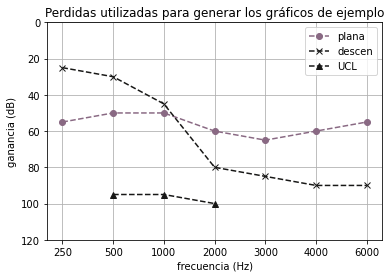

In [40]:
# Data for plotting

HTL_plana={"250":55,"500":50,"1000":50,"2000":60,"3000":65,"4000":60,
           "6000":55}

HTL_descendente ={"250":25,"500":30,"1000":45,"2000":80,"3000":85,"4000":90,
           "6000":90}

UCL = {"500":95, "1000":95, "2000":100}


curve_plane = HTL_plana.items()
x1, y1 = zip(*curve_plane)


curve_desc = HTL_descendente.items()
x2, y2 = zip(*curve_desc)

curve_UCL = UCL.items()
x3, y3 = zip(*curve_UCL)

fig, ax = plt.subplots()
ax.plot(x1,y1, linestyle='--', marker='o', color=cl_1, label='plana')
ax.plot(x2,y2, linestyle='--', marker='x', color=cl_2, label='descen')
ax.plot(x3,y3, linestyle='--', marker='^', color=cl_2, label='UCL')

leg = ax.legend();
plt.ylim([0, 120])
plt.gca().invert_yaxis()


ax.set(xlabel='frecuencia (Hz)', ylabel='ganancia (dB)',
       title='Perdidas utilizadas para generar los gráficos de ejemplo')
ax.grid()

fig.savefig("ejemplos de perdida.jpg")
plt.show()


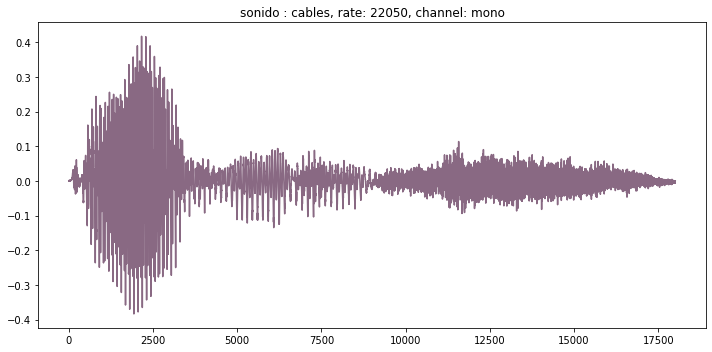

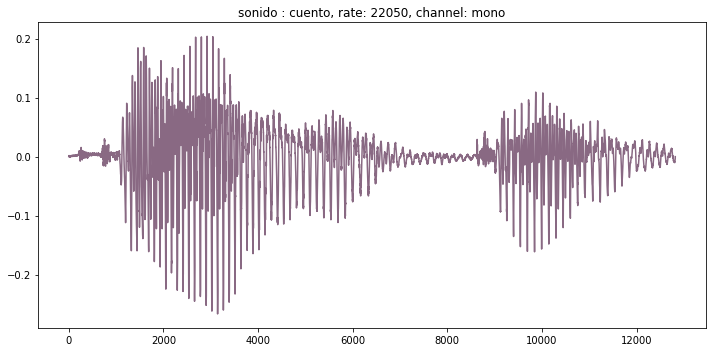

<Figure size 432x288 with 0 Axes>

In [41]:
data_sound = []
for i in sonido_dir:
    rt = draw_sound(i)
    data_sound.append(rt)



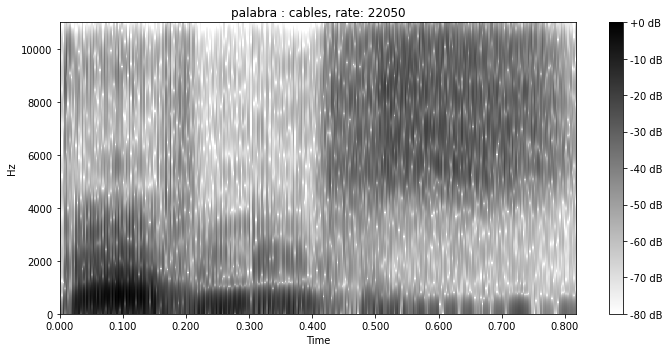

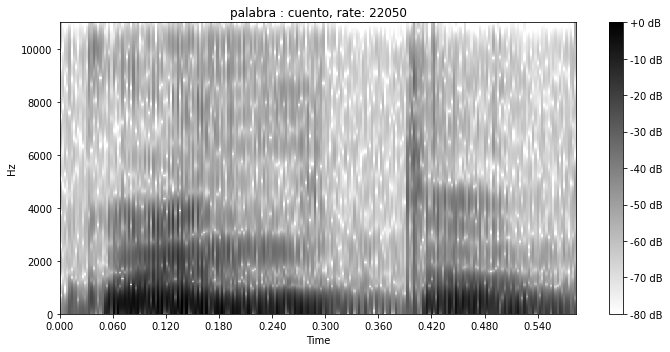

In [42]:
for i in data_sound:
    spectro(i[0], i[1], i[2])

In [43]:
####FUNCIONES DE AYUDA####
#Energía a dB 
def power_to_db(S, ref=1.0, amin=1e-10, top_db=80.0):
    S = np.asarray(S)
    magnitude = S
    if callable(ref):
        ref_value = ref(magnitude)
    else:
        ref_value = np.abs(ref)
        log_spec = 10.0 * np.log10(np.maximum(amin, magnitude))
        log_spec -= 10.0 * np.log10(np.maximum(amin, ref_value))
    if top_db is not None:
        log_spec = np.maximum(log_spec, log_spec.max() - top_db)
    return log_spec

#dB a Energía   
def db_to_power(S_db, ref=1.0):
    return ref * np.power(10.0, 0.1 * S_db)

#Amplitud a dB
def amplitude_to_db(S, ref=1.0, amin=1e-5, top_db=80.0):
    S = np.asarray(S)
    Sign = np.sign(S)
    magnitude = np.abs(S)
    if callable(ref):
        ref_value = ref(magnitude)
    else:
        ref_value = np.abs(ref)
    power = np.square(magnitude, out=magnitude)
    return power_to_db(power, ref=ref_value ** 2, amin=amin ** 2, top_db=top_db), Sign

#dB a amplitud
def db_to_amplitude(S_db, sign, ref=1.0):
    result = (db_to_power(S_db, ref=ref ** 2) ** 0.5)*sign
    return result



In [44]:
#Bandas entre octavas
list_band = [
             [20, 384], #banda cf: <- 256
             [385,768], #banda cf:512
             [769, 1280], #banda cf:1024
             [1281, 2524], #banda cf:2048
             [2525, 3548], #banda cf:3000
             [3549, 5048], #banda cf:4096
             [5049, 7091], #banda cf:6000
             [7092, 20000], #banda cf:8192 ->
             ] 


#filtro de banda 
def bandpass_filter(data, ampli, cuters, fs, order=5, gain=0):
    lowcut, highcut = cuters
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    filtered = ((lfilter(b, a, data))*10**(gain/20))
    return filtered

#Separador de bandas frecuenciales. 
def equalizer_band(fs, data, gain=0, band=list_band):

    mem = [[],[],[],[],[],[],[],[]]
    for idx, val in enumerate(list_band):
        extract = bandpass_filter(data,wdrc,val,fs,order=3)
        mem[idx] = extract

    result = mem[0] + mem[1] + mem[2]+ mem[3]+ mem[4]+ mem[5]+ mem[6]+ mem[7]
    return result




In [152]:
HTL_p = HTL_plana
HTL_d = HTL_descendente
test_data = data_sound[0][1]

test_1 = amplitude_to_db(test_data,top_db = 120)






In [151]:
HTL_p = HTL_plana
HTL_d = HTL_descendente
test_data = data_sound[0][1]

test_1 = amplitude_to_db(test_data,top_db = 120)

lis = test_1[0]
print(len(test_1[0]))
print(len(test_1[1]))

for i in range(len(lis)):
    
    f = FIG6(abs(lis[i]), 40)
    r = abs(lis[i]) + f
    w = wdrc(abs(r))
    test_fig = np.append(test_fig6, w, axis=0)
    #test_fig6.append(w[0])

print(len(test_fig))
result = db_to_amplitude(test_fig6, test_1[1])
plt.plot(test_fig6)

18004
18004
72018


ValueError: operands could not be broadcast together with shapes (72016,) (18004,) 

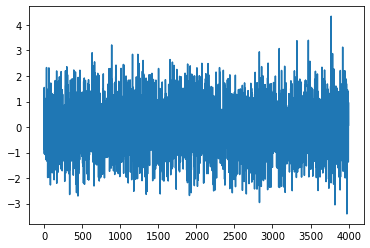

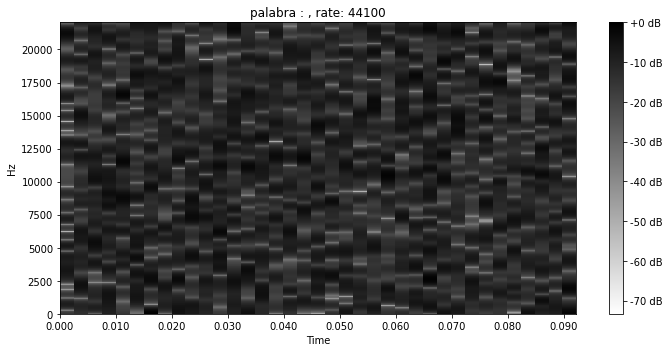

In [46]:
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, size=4000) # 1000 samples with normal distribution
plt.plot(s)
spectro(44100, s, "")

In [85]:
import scipy.fftpack

fig = plt.figure(figsize=[14,4])
N = 4000           # Number of samplepoints
Fs = 20000.0
T = 1.0 / Fs      # N_samps*T (#samples x sample period) is the sample spacing.
N_fft = 80        # Number of bins (chooses granularity)
x = np.linspace(0, N*T, N)     # the interval
y = s
# removing the mean of the signal
mean_removed = np.ones_like(y)*np.mean(y)
y = y - mean_removed

# Compute the fft.
yf = scipy.fftpack.fft(y,n=N_fft)
xf = np.arange(0,Fs,Fs/N_fft)

##### Plot the fft #####
ax = plt.subplot(121)
pt, = ax.plot(xf,np.abs(yf), lw=2.0, c='b')
p = plt.Rectangle((Fs/2, 0), Fs/2, ax.get_ylim()[1], facecolor="grey", fill=True, alpha=0.75, hatch="/", zorder=3)
ax.add_patch(p)
ax.set_xlim((ax.get_xlim()[0],Fs))
ax.set_title('FFT', fontsize= 16, fontweight="bold")
ax.set_ylabel('FFT magnitude (power)')
ax.set_xlabel('Frequency (Hz)')
plt.legend((p,), ('mirrowed',))
ax.grid()

##### Close up on the graph of fft#######
# This is the same histogram above, but truncated at the max frequence + an offset. 
offset = 1    # just to help the visualization. Nothing important.
ax2 = fig.add_subplot(122)
ax2.plot(xf,np.abs(yf), lw=2.0, c='b')
ax2.set_xticks(xf)
ax2.set_xlim(-1,int(Fs/6)+offset)
ax2.set_title('FFT close-up', fontsize= 16, fontweight="bold")
ax2.set_ylabel('FFT magnitude (power) - log')
ax2.set_xlabel('Frequency (Hz)')
ax2.grid()

plt.yscale('log')

NameError: name 's' is not defined

<Figure size 1008x288 with 0 Axes>

In [86]:
import scipy.fftpack
new_n = equalizer_band(44100, s)

Y    = np.fft.fft(new_n)
freq = np.fft.fftfreq(len(new_n), new_n[1] - new_n[0])
plt.plot(freq,s)
#plt.plot(s)
#plt.plot(new_n)
#spectro(44100,new_n,"")


NameError: name 'equalizer_band' is not defined

In [87]:

y, _ = librosa.load(librosa.ex('trumpet'))

#S = np.abs(librosa.stft(s))

Nfft = 256
stft = np.abs(librosa.stft(s, n_fft=Nfft))
freqs = librosa.fft_frequencies(sr=sr, n_fft=Nfft)

#print(len(S[4]))


fig, ax = plt.subplots()
ax.plot(freqs,stft)



NameError: name 's' is not defined

In [88]:
name_file = "salida.wav"
write(name_file, 44100, new_sound)
ampli = draw_sound("{}".format(name_file), name=True)
print(len(ampli[1]))
spectro(44100, ampli[1], ampli[2])


NameError: name 'new_sound' is not defined

In [ ]:
nn = np.array([1,2,3,4,5])
x = 10
for 